# In class exercises for ML tutorials

## Read in data from eeg study
* This time I've kept in data across a 1s window from many electrodes (20) sampled at 250Hz, so now we have a [960, 20, 250] matrix that contains data from all 960 trials, 20 electrodes, and over a 1s window following stimulus onset
* Also read in a "cond_labels" vector that has 960 0's and 1's to mark trials from the two experimental conditions 

## import stuff...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
 
fig_font = {'fontname':'Arial', 'size':'20'}

In [3]:
# load the data...
eeg = np.load('class_demo_eeg.npz')

# get the different arrays like this...
eeg['data']
eeg['sr']
eeg['tx']
eeg['cond_labels']

# shape of data
print('Shape of the big eeg data set: ', eeg['data'].shape)

# and if you want to save some typing, especially because we only have a few variables, you reassign the different arrays like this
data = eeg['data']
sr = eeg['sr']
tx = eeg['tx']
cond_labels = eeg['cond_labels']


Shape of the big eeg data set:  (960, 20, 250)


## Compute the mean across the first dimension (trials) and then plot the mean response across time in each of the 20 electrodes on one axis

* Might need to transpose the data into a Time x Electrode format

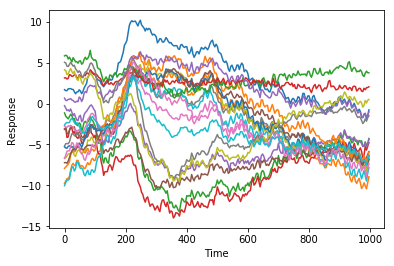

In [7]:
mean_data = np.mean(data,axis=0)
plt.plot(tx, mean_data.T)
plt.xlabel('Time')
plt.ylabel('Response')
plt.show()

## That gives you an idea about what the pattern of data looks like across electrodes. 
* Next, take the mean across time, so you have a 960 x 20 matrix 
* Use the cond_labels vector to sort the data based on condition (so you have two 480 x 20 matrices)
* Do classification to see if you can decode the experimental condition
* Remember - break up your data into independent training and testing sets
* Set C to a small number if this is taking a long time...

In [24]:
all_data = np.mean(data, axis=2)
data0 = all_data[cond_labels==0,:]
data1 = all_data[cond_labels==1,:]

pcnt_trn = 0.9
num_train_per_cond = int(np.floor(pcnt_trn * data0.shape[0]))

trn_data = np.vstack((data0[:num_train_per_cond,:], data1[:num_train_per_cond,:]))
trn_labels = np.hstack((np.zeros(num_train_per_cond), np.ones(num_train_per_cond)))

tst_data = np.vstack((data0[num_train_per_cond:,:], data1[num_train_per_cond:,:]))
num_tst_per_cond = int(tst_data.shape[0]/2)
tst_labels = np.hstack((np.zeros(num_tst_per_cond), np.ones(num_tst_per_cond)))

model = SVC(kernel='linear', C=1)
model.fit(trn_data, trn_labels)

class_labels = model.predict(tst_data)

class_ass = np.sum(class_labels==tst_labels) / tst_data.shape[0]
print('SVM classification accuracy: ', class_ass)

SVM classification accuracy:  0.5520833333333334


## Now try doing this across timepoints!
* First do a time window based on where you think there is nice separation in the responses across electrodes (look at the data that you plotted above)...maybe try 300-400msec post stim
* Then you can try timepoint x timepoint or a moving window

In [30]:
t_wind = (tx>=300) & (tx <400)
all_data = np.mean(data[:,:,t_wind], axis=2)

data_0 = all_data[cond_labels==0,:]
data_1 = all_data[cond_labels==1,:]

pcnt_trn = 0.9
num_train = int(np.floor(pcnt_trn * data_0.shape[0]))

trn_data = np.vstack((data_0[:num_train,:], data_1[:num_train,:]))
trn_labels = np.hstack((np.zeros(num_train), np.ones(num_train)))

tst_data = np.vstack((data_0[num_train:,:], data_1[num_train:,:]))
num_tst = int(tst_data.shape[0] / 2)
tst_labels = np.hstack((np.zeros(num_tst), np.ones(num_tst)))
model = SVC(kernel='linear', C=1)
model.fit(trn_data, trn_labels)
class_labels = model.predict(tst_data)
class_acc = np.sum(class_labels==tst_labels) / tst_data.shape[0]
print('SVM classification accuracy: ', class_acc)

SVM classification accuracy:  0.6770833333333334


## Bonus - try using randomization testing to eval significance